In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  1.0  126.3 ...  3.5  0.8  0.0]
 [ 0.0  8.5  224.8 ...  2.2  1.0  0.0]
 [ 1.0  12.3  1460.6 ...  6.0  1.0  0.0]
 ...
 [ 1.0  18.6  1291.3 ...  4.2  1.0  0.0]
 [ 1.0  10.1  939.2 ...  5.6  1.0  0.0]
 [ 1.0  9.5  635.4 ...  4.3  1.0  0.0]]


In [6]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 4]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 4]
YTRAIN = brainT[index_30percent:, :1]

1128


In [7]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_shape = (1,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 3s 13ms/step - loss: 0.6767 - accuracy: 0.5535 - val_loss: 0.6728 - val_accuracy: 0.5505
Epoch 2/500
83/83 [==============================] - 1s 8ms/step - loss: 0.6707 - accuracy: 0.5535 - val_loss: 0.6682 - val_accuracy: 0.5505
Epoch 3/500
83/83 [==============================] - 1s 9ms/step - loss: 0.6662 - accuracy: 0.5535 - val_loss: 0.6638 - val_accuracy: 0.5505
Epoch 4/500
83/83 [==============================] - 1s 10ms/step - loss: 0.6620 - accuracy: 0.5535 - val_loss: 0.6593 - val_accuracy: 0.5505
Epoch 5/500
83/83 [==============================] - 1s 9ms/step - loss: 0.6576 - accuracy: 0.5535 - val_loss: 0.6549 - val_accuracy: 0.5505
Epoch 6/500
83/83 [==============================] - 1s 7ms/step - loss: 0.6531 - accuracy: 0.5535 - val_loss: 0.6502 - val_accuracy: 0.5505
Epoch 7/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6482 - accuracy: 0.5535 - val_loss: 0.6450 - val_accuracy: 0.5505
Epoch 8/500

Epoch 59/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2714 - accuracy: 0.9727 - val_loss: 0.2566 - val_accuracy: 0.9778
Epoch 60/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2661 - accuracy: 0.9719 - val_loss: 0.2510 - val_accuracy: 0.9778
Epoch 61/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2609 - accuracy: 0.9727 - val_loss: 0.2457 - val_accuracy: 0.9778
Epoch 62/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2559 - accuracy: 0.9727 - val_loss: 0.2406 - val_accuracy: 0.9778
Epoch 63/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2510 - accuracy: 0.9723 - val_loss: 0.2359 - val_accuracy: 0.9770
Epoch 64/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2462 - accuracy: 0.9727 - val_loss: 0.2307 - val_accuracy: 0.9778
Epoch 65/500
83/83 [==============================] - 1s 7ms/step - loss: 0.2417 - accuracy: 0.9723 - val_loss: 0.2260 - val_accuracy: 0.9778
Epoch 

83/83 [==============================] - 1s 7ms/step - loss: 0.1421 - accuracy: 0.9727 - val_loss: 0.1208 - val_accuracy: 0.9770
Epoch 117/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1415 - accuracy: 0.9727 - val_loss: 0.1201 - val_accuracy: 0.9770
Epoch 118/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1409 - accuracy: 0.9723 - val_loss: 0.1195 - val_accuracy: 0.9770
Epoch 119/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1404 - accuracy: 0.9734 - val_loss: 0.1189 - val_accuracy: 0.9770
Epoch 120/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1399 - accuracy: 0.9730 - val_loss: 0.1183 - val_accuracy: 0.9770
Epoch 121/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1394 - accuracy: 0.9727 - val_loss: 0.1180 - val_accuracy: 0.9770
Epoch 122/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1390 - accuracy: 0.9727 - val_loss: 0.1174 - val_accuracy: 0.9770
Epoch 123/500

83/83 [==============================] - 1s 7ms/step - loss: 0.1285 - accuracy: 0.9730 - val_loss: 0.1039 - val_accuracy: 0.9778
Epoch 174/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1283 - accuracy: 0.9738 - val_loss: 0.1035 - val_accuracy: 0.9770
Epoch 175/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1283 - accuracy: 0.9730 - val_loss: 0.1035 - val_accuracy: 0.9770
Epoch 176/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1282 - accuracy: 0.9730 - val_loss: 0.1035 - val_accuracy: 0.9778
Epoch 177/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1281 - accuracy: 0.9730 - val_loss: 0.1033 - val_accuracy: 0.9770
Epoch 178/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1280 - accuracy: 0.9734 - val_loss: 0.1033 - val_accuracy: 0.9787
Epoch 179/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1281 - accuracy: 0.9730 - val_loss: 0.1030 - val_accuracy: 0.9770
Epoch 180/500

83/83 [==============================] - 1s 6ms/step - loss: 0.1260 - accuracy: 0.9738 - val_loss: 0.0996 - val_accuracy: 0.9778
Epoch 231/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1259 - accuracy: 0.9730 - val_loss: 0.0997 - val_accuracy: 0.9805
Epoch 232/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1259 - accuracy: 0.9734 - val_loss: 0.0995 - val_accuracy: 0.9778
Epoch 233/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1259 - accuracy: 0.9734 - val_loss: 0.0996 - val_accuracy: 0.9805
Epoch 234/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1258 - accuracy: 0.9738 - val_loss: 0.0994 - val_accuracy: 0.9778
Epoch 235/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1259 - accuracy: 0.9730 - val_loss: 0.0994 - val_accuracy: 0.9787
Epoch 236/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1259 - accuracy: 0.9734 - val_loss: 0.0993 - val_accuracy: 0.9778
Epoch 237/500

83/83 [==============================] - 1s 8ms/step - loss: 0.1253 - accuracy: 0.9730 - val_loss: 0.0981 - val_accuracy: 0.9805
Epoch 288/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1252 - accuracy: 0.9738 - val_loss: 0.0979 - val_accuracy: 0.9778
Epoch 289/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1254 - accuracy: 0.9730 - val_loss: 0.0979 - val_accuracy: 0.9796
Epoch 290/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1253 - accuracy: 0.9738 - val_loss: 0.0980 - val_accuracy: 0.9805
Epoch 291/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1253 - accuracy: 0.9738 - val_loss: 0.0979 - val_accuracy: 0.9778
Epoch 292/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1253 - accuracy: 0.9734 - val_loss: 0.0979 - val_accuracy: 0.9787
Epoch 293/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1253 - accuracy: 0.9730 - val_loss: 0.0979 - val_accuracy: 0.9796
Epoch 294/500

83/83 [==============================] - 1s 7ms/step - loss: 0.1251 - accuracy: 0.9738 - val_loss: 0.0971 - val_accuracy: 0.9778
Epoch 345/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1252 - accuracy: 0.9730 - val_loss: 0.0972 - val_accuracy: 0.9805
Epoch 346/500
83/83 [==============================] - 1s 9ms/step - loss: 0.1252 - accuracy: 0.9734 - val_loss: 0.0972 - val_accuracy: 0.9805
Epoch 347/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0973 - val_accuracy: 0.9814
Epoch 348/500
83/83 [==============================] - 1s 9ms/step - loss: 0.1251 - accuracy: 0.9727 - val_loss: 0.0973 - val_accuracy: 0.9814
Epoch 349/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1251 - accuracy: 0.9730 - val_loss: 0.0973 - val_accuracy: 0.9814
Epoch 350/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1252 - accuracy: 0.9730 - val_loss: 0.0971 - val_accuracy: 0.9805
Epoch 351/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0969 - val_accuracy: 0.9814
Epoch 402/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.9738 - val_loss: 0.0968 - val_accuracy: 0.9805
Epoch 403/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.9738 - val_loss: 0.0968 - val_accuracy: 0.9805
Epoch 404/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.9730 - val_loss: 0.0968 - val_accuracy: 0.9805
Epoch 405/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0968 - val_accuracy: 0.9814
Epoch 406/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0968 - val_accuracy: 0.9805
Epoch 407/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9730 - val_loss: 0.0968 - val_accuracy: 0.9814
Epoch 408/500

83/83 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0966 - val_accuracy: 0.9814
Epoch 459/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1251 - accuracy: 0.9730 - val_loss: 0.0965 - val_accuracy: 0.9796
Epoch 460/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0966 - val_accuracy: 0.9805
Epoch 461/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1251 - accuracy: 0.9738 - val_loss: 0.0966 - val_accuracy: 0.9814
Epoch 462/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1252 - accuracy: 0.9734 - val_loss: 0.0966 - val_accuracy: 0.9805
Epoch 463/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0965 - val_accuracy: 0.9805
Epoch 464/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1251 - accuracy: 0.9734 - val_loss: 0.0965 - val_accuracy: 0.9805
Epoch 465/500

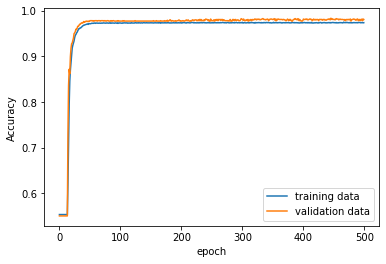

In [9]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [10]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9734


In [11]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 4ms/step - loss: 0.0965 - accuracy: 0.9805


In [12]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]
83/83 [==============================] - 1s 4ms/step
[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9842381786339754
0.95578231292517
0.9698015530629853


In [14]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
36/36 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 0.1]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [15]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9938900203665988
0.9625246548323472
0.9779559118236473
